***

งานหลักๆ ในทาง computer vision สามารถแบ่งออกได้เป็นสี่อย่าง ตามรูปด้านบนนี้ ได้แก่
* __Classification__ คือการบอกว่ารูปที่เห็นอยู่นี้เป็นรูปอะไร
* __Semantic Segmentation__ คือการจำแนกแต่ละ pixel ในรูป ว่าเป็น pixel ของวัตถุใด
* __Object Detection__ คือการหาตำแหน่งของวัตถุต่างๆ ภายในรูป
* __Instance Segmentation__ คือการหาว่าวัตถุต่างๆ ภายในรูป มี pixel ไหนบ้าง ซึ่ง Mask R-CNN คือโมเดลที่ออกแบบมาเพื่อใช้สำหรับงานนี้โดยเฉพาะ

งาน instance segmentation เหมือนเป็นการรวม object detection และ semantic segmentation เข้าไว้ด้วยกัน ดังรูปด้านล่างนี้ครับ

<img src="https://i.imgur.com/Z24CDIV.png" style="height:200px">
<div style="text-align: right"><font size="2">(ภาพจาก[สไลด์ของ Kaiming He](http://kaiminghe.com/iccv17maskrcnn/maskrcnn_iccv2017_oral_kaiminghe.pdf))</font></div>

ซึ่งก่อนหน้าที่ Mask R-CNN จะถือกำเนิดขึ้นมา งานด้าน object detection จะมีโมเดล [Faster R-CNN](https://arxiv.org/abs/1506.01497) ซึ่งใช้ทำงานนี้ได้ดี ส่วนงานด้าน semantic segmentation ก็จะมีโมเดล [FCN](https://arxiv.org/abs/1411.4038) (Fully Convolutional Network) ที่ใช้ทำงานนี้ได้ดีเช่นเดียวกัน โมเดล Mask R-CNN เหมือนเป็นการรวมทั้ง Faster R-CNN และ FCN เข้าไว้ด้วยกัน หรืออาจจะมองว่า Mask R-CNN ใช้ Faster R-CNN เป็นพื้นฐาน และนำ FCN มาเพิ่มเติมก็ได้ ดังรูปด้านล่างนี้ครับ

<img src="https://i.imgur.com/p8EuAP5.png">
<div style="text-align: right"><font size="2">(ภาพจาก[สไลด์ของ Kaiming He](http://kaiminghe.com/iccv17maskrcnn/maskrcnn_iccv2017_oral_kaiminghe.pdf))</font></div>

### 1.1.2 Faster R-CNN

Faster R-CNN เป็นโมเดลที่พัฒนาต่อเนื่องมาจาก R-CNN และ Fast R-CNN ท่านที่สนใจเรียนรู้เรื่องนี้เพิ่มเติม สามารถอ่านได้ที่[บล็อกของคุณ Lilian Weng](https://lilianweng.github.io/lil-log/2017/12/31/object-recognition-for-dummies-part-3.html) หรือ [lecture ของคอร์ส CS231n](https://www.youtube.com/watch?v=nDPWywWRIRo) ก็ได้ครับ สำหรับในที่นี้จะขอกล่าวถึงเพียง Faster R-CNN ซึ่่งสามารถสรุปได้ดังรูปด้านล่างนี้

<img src="https://i.imgur.com/slKHttx.png"  style="height:400px">
<div style="text-align: right"><font size="2">(ภาพจาก[สไลด์คอร์ส CS231n](http://cs231n.stanford.edu/slides/2019/cs231n_2019_lecture12.pdf))</font></div>

การทำ object detection ของตระกูล R-CNN จะเรียกว่า two-stage detection คือมีการแบ่งการประมวลผลเป็นสองขั้นตอน ดังนี้ครับ

* __ขั้นตอนแรก (first stage)__ เป็นการหาขอบเขต (region หรือ bounding box) ที่น่าจะมีวัตถุอยู่ เพื่อจะส่งเข้าสู่ขั้นตอนที่สองต่อไป ในขั้นตอนนี้จะมีส่วนประกอบที่สำคัญคือ

    * __backbone network__ เป็น neural network ที่รับรูปภาพ input และประมวลผลจนได้เป็น feature map ออกมา โดย backbone network จะใช้ architecture สำหรับงาน computer vision แบบใดก็ได้ เช่น [ResNet](http://www.arxiv.org/abs/1512.03385) หรือ [ResNeXt](https://arxiv.org/abs/1611.05431) หรือถ้าใช้ [Feature Pyramid](https://arxiv.org/abs/1612.03144) ร่วมด้วย ก็จะทำให้ได้ความถูกต้องที่สูงขึ้น
    
    * __region proposal network__ เป็น neural network ที่ทำ classification เพื่อจำแนกว่าขอบเขตไหนที่น่าจะมีวัตถุอยู่ รวมทั้งมีการทำ regression เพื่อที่จะได้ขอบเขตที่แม่นยำขึ้น สำหรับ region proposal network นี้เอง เป็นสิ่งที่ทำให้ Faster R-CNN แตกต่างจาก R-CNN ที่ผ่านมา ซึ่งใช้ region proposal algorithm ภายนอก อย่าง [Selective Search](http://www.huppelen.nl/publications/selectiveSearchDraft.pdf) เข้ามาช่วย
    
    ขอบเขตที่ region proposal network นำมาพิจารณา (อาจเรียกว่า anchor box) คือกล่องสี่เหลี่ยมหลายๆ ขนาด ที่ครอบคลุม feature map ในตำแหน่งต่างๆ ดังเช่นรูปด้านล่างนี้แสดงตัวอย่างการทำงานของขั้นตอนแรก เมื่อรูปแมวเหมียวขนาด 640x480 ผ่าน CNN ที่เป็น backbone network เข้ามา จะได้ feature map ขนาด 20x15 และมีจำนวน channel เท่ากับ 512 
    
    กำหนดให้แต่ละจุดของ feature map มี anchor box จำนวน K ขนาด จะได้ว่ามีจำนวน anchor box ที่ต้องพิจารณาทั้งหมดเท่ากับ Kx20x15 และในจำนวน anchor box ทั้งหมดนี้ ในส่วนของ region proposal network ก็จะทำการหาขอบเขตที่น่าจะเป็น object มากที่สุดมาจำนวนนึง เช่น 300 ขอบเขต เพื่อส่งเป็น region proposal หรือ RoI (Region of Interest) สำหรับขั้นตอนต่อไปครับ
    


<img src="https://i.imgur.com/2UA5zwG.png" style="height:250px">
<div style="text-align: right"><font size="2">(ภาพจาก[สไลด์คอร์ส CS231n](http://cs231n.stanford.edu/slides/2019/cs231n_2019_lecture12.pdf))</font></div>

* __ขั้นตอนที่สอง (second stage)__ ประกอบด้วยกระบวนการต่างๆ ดังนี้ครับ

    * __RoI Pool__ เป็นการทำ RoI ของ feature map ที่มีขนาดแตกต่างกัน ให้มีขนาดเดียวกัน เพื่อเป็น input ให้กับ neural network ในชั้นต่อไป โดย RoI Pool จะใช้ max pooling เลย แต่ Mask R-CNN จะเปลี่ยนขั้นตอนนี้เป็น RoI Align ซึ่งจะกล่าวถึงในหัวข้อถัดไปครับ
    
    * ส่วนสุดท้ายจะเป็นหัว classification ที่ทำการจำแนกว่าเป็น object คลาสอะไร (หัว class) และหัว regression ที่ทำการปรับขอบเขตของ RoI ให้แม่นยำขึ้น (หัว box)
    
    

### 1.1.3 FCN

สำหรับ FCN เป็น neural network ที่มีลักษณะดังรูปด้านล่างนี้ โดยจะรับ input เข้ามาเป็นรูปภาพ และให้ output เป็นการจำแนกคลาสของแต่ละ pixel ในรูปภาพ โดย feature map ของแต่ละ layer จะมีขนาดเล็กลงเรื่อยๆ (downsampling) จนถึงตรงกลาง แล้วค่อยขยายให้ใหญ่ขึ้น (upsampling) ที่เป็นเช่นนี้เพราะว่า ถ้าทำ convolution ขนาดเดียวกันกับรูปภาพทั้งหมด จะสิ้นเปลืองการคำนวณมาก นอกจากนี้ยังมีเหตุผลเช่นเดียวกับการทำ [Autoencoder](https://en.wikipedia.org/wiki/Autoencoder) นั่นคือในส่วนของ downsampling จะช่วยคัดกรองข้อมูลที่สำคัญเกี่ยวกับความหมายของรูปภาพออกมา (what part) ก่อนที่จะทำการ upsampling เพื่อเก็บรายละเอียดเกี่ยวกับตำแหน่งให้แม่นยำขึ้น (where part) นอกจากนี้จะมี skip connection เพื่อรักษาข้อมูลไม่ให้สูญหายในขั้น downsampling ด้วย

<img src="https://i.imgur.com/4Blooki.png" style="height:250px">
<div style="text-align: right"><font size="2">(ภาพจาก[สไลด์คอร์ส CS231n](http://cs231n.stanford.edu/slides/2019/cs231n_2019_lecture12.pdf))</font></div>

### 1.1.4 RoI Align
ในกรณีที่ RoI ของรูปภาพ input ไม่ตรงกับ grid ของ feature map ถ้าใช้ RoI Pool ธรรมดา จะต้องทำการเลื่อนให้ RoI มาอยู่ตรงกับ grid ซึ่งตรงนี้เองที่ทำให้มีความคลาดเคลื่อนของตำแหน่งเกิดขึ้นได้ ดังรูปด้านล่างนี้

<img src="https://i.imgur.com/6QJy11h.png" style="height:250px">
<div style="text-align: right"><font size="2">(ภาพจาก[สไลด์ของ Kaiming He](http://kaiminghe.com/iccv17maskrcnn/maskrcnn_iccv2017_oral_kaiminghe.pdf))</font></div>

RoI Align แก้ปัญหาของ RoI Pool โดยวิธีการที่แสดงดังตัวอย่างในรูปด้านล่าง เช่นเมื่อมี feature map ขนาด 5x5 และ RoI คือสี่เหลี่ยมใหญ่สีส้ม ถ้าต้องการให้ feature map ของ RoI นี้เหลือขนาด 2x2 ก็จะทำการแบ่ง RoI ตั้งต้นเป็นสี่ส่วนเท่าๆ กัน แล้วกำหนดจุดภายในขึ้นมาสี่จุดในแต่ละส่วน และคำนวณค่า feature ของจุดทั้งหมด โดยใช้ bilinear interpolation จากค่า feature จริงที่อยู่ใกล้เคียง จากนั้นจึงทำ max pooling ในแต่ละส่วน ก็จะได้ feature map ขนาด 2x2 ตามที่ต้องการครับ

<img src="https://i.imgur.com/mIKiNwx.png" style="height:250px">
<div style="text-align: right"><font size="2">(ภาพจาก[สไลด์ของ Kaiming He](http://kaiminghe.com/iccv17maskrcnn/maskrcnn_iccv2017_oral_kaiminghe.pdf))</font></div>

### 1.1.5 Mask Head

นอกจาก RoI Align แล้ว สิ่งที่ทำให้ Mask R-CNN ต่างจาก Faster R-CNN ก็คือการเพิ่มหัว mask เข้ามา จากหัว class และหัว box ที่มีอยู่เดิม เพื่อทำหน้าที่ทำนาย mask ที่อยู่ภายใน RoI ของทุกคลาส ดังรูปด้านล่าง โดยในรูปนี้เป็นการแสดงหัว mask มีขนาด 28x28 และมี 80 คลาส

<img src="https://i.imgur.com/LQvDjFk.png" style="height:250px">
<div style="text-align: right"><font size="2">(ภาพจาก[สไลด์ของ Kaiming He](http://kaiminghe.com/iccv17maskrcnn/maskrcnn_iccv2017_oral_kaiminghe.pdf))</font></div>

หลังจากนั้นจะทำการปรับสเกลของ mask ให้มีขนาดเท่ากับ RoI ของรูปต้นฉบับ เพื่อเป็น output สำหรับส่วนของงาน segmentation ดังรูปด้านล่างนี้ครับ

<img src="https://i.imgur.com/eeC0SBh.png" style="height:250px">
<div style="text-align: right"><font size="2">(ภาพจาก[สไลด์ของ Kaiming He](http://kaiminghe.com/iccv17maskrcnn/maskrcnn_iccv2017_oral_kaiminghe.pdf))</font></div>

## 1.2 iMaterialist - Fashion 2019

### 1.2.1 แนะนำการแข่งขัน

สำหรับการแข่งขันในครั้งนี้ จัดเป็นงาน instance segmentation เพื่อแยกประเภทของเครื่องแต่งกายที่ปรากฏอยู่ภายในรูปภาพ ตัวอย่างเช่นในรูปด้านล่างนี้ โดยข้อมูลที่ให้มา จะมี label อยู่สองส่วน ได้แก่
* __ส่วนของ class__ คลาสในที่นี้จะประกอบไปด้วย category และ attribute สำหรับ category คือประเภทของเครื่องแต่งกาย เช่น เสื้อ กางเกง ส่วน attribute จะเป็นลักษณะของ category นั้น เช่น (กางเกง) ฟิต เหนือเอว ลายเรียบ เป็นต้น
* __ส่วนของ mask__ จะบอกว่าวัตถุคลาสต่างๆ ประกอบด้วย pixel ไหนบ้าง

การแข่งขันครั้งนี้เป็นส่วนนึงของ [FGVC6 workshop](https://sites.google.com/view/fgvc6/) ซึ่งจัดขึ้นรวมกับ [CVPR conference ปีนี้](http://cvpr2019.thecvf.com/) ด้วยครับ

<img src="https://i.imgur.com/lrssrix.png">
<div style="text-align: right"><font size="2">(ภาพจาก[ข้อมูล iMaterialist - Fashion 2019](https://github.com/visipedia/imat_comp))</font></div>

### 1.2.2 การวัดผล

โดยทั่วไปในงาน image segmentation จะใช้ค่า IoU (Intersection over Union) ในการวัดผล โดยค่า IoU ก็คือ

$$IoU(G, P) = \frac{\left | G\cap P \right |}{\left | G\cup P \right |}$$

เมื่อ $G$ คือเซ็ตของ pixel ที่เป็น ground truth
และ $P$ คือเซ็ตของ pixel ที่เป็น prediction ของเรา

สำหรับค่า IoU สามารถเขียนให้อยู่ในอีกรูปนึงได้เป็น

$$IoU = \frac{TP}{TP+FP+FN}$$

เมื่อ TP, FP และ FN คือจำนวน pixel ที่เป็น true positive, false positive และ false negative ตามลำดับ

โดยในงานนี้จะเพิ่มค่า threshold ระดับต่างๆ เข้ามาด้วย โดยมี 10 ระดับ คือ {0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95} แล้วในแต่ละระดับ ถ้าค่า IoU ไม่เกิน threshold ที่กำหนด ค่า TP ที่ threshold นี้ ($TP(t)$) จะกลายเป็น 0 เลย และการวัดผลจริงๆ จะนำค่าของทุก threshold มาเฉลี่ยกัน ดังสูตรด้านล่างนี้ครับ

$$\frac{1}{\left | threshold \right |}\sum_{t}\frac{TP(t)}{TP(t)+FP(t)+FN(t)}$$

***

# 2. ภาคปฏิบัติ

ในปัจจุบันมี library สำหรับ Mask R-CNN ให้เลือกใช้มากมาย เช่น 
* __[torchvision 0.3](https://pytorch.org/blog/torchvision03/)__ ซึ่ง torchvision เวอร์ชันนี้ ก็มีโมเดล Mask R-CNN มาให้เรียกใช้งานได้
* __[maskrcnn-benchmark](https://github.com/facebookresearch/maskrcnn-benchmark)__ เป็น library ที่พัฒนาโดยทีม Facebook Research
* __[mmdetection](https://github.com/open-mmlab/mmdetection)__ เป็น library ที่พัฒนาโดยทีมที่ชนะการแข่งขัน [COCO Detection 2018 challenge](http://cocodataset.org/#detection-leaderboard)
* __[Mask R-CNN ของบริษัท Matterport](https://github.com/matterport/Mask_RCNN)__

โดยสาม library แรกได้ใช้ PyTorch ในการทำ ส่วน library สุดท้ายจะเป็น Keras กับ TensorFlow ครับ

## 2.1 Import and Define
ในขั้นแรกเป็นการ import ตัว library ต่างๆ และกำหนดค่าตัวแปรที่ต้องใช้

In [1]:
import os
import gc
import sys
import json
import glob
import random
from pathlib import Path

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import itertools
from tqdm import tqdm

from imgaug import augmenters as iaa
from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'imgaug'

In [2]:
DATA_DIR = Path('/kaggle/input')
ROOT_DIR = Path('/kaggle/working')

NUM_CATS = 46 # ในที่นี้จะทำ classification เฉพาะส่วนที่เป็น category ซึ่งมีจำนวนทั้งสิ้น 46
IMAGE_SIZE = 512 # รูปภาพที่เป็น input เข้า Mask R-CNN จะถูกทำให้เป็นขนาด 512x512 ซึ่งเท่ากับขนาดของ mask ที่ส่งเป็นคำตอบ

## 2.2 Download Libraries and Pretrained Weights

ในที่นี้ เราได้เลือก Mask R-CNN ของบริษัท Matterport มาใช้ครับ ก็จะทำการดาวน์โหลด library ตัวนี้มา รวมทั้งดาวน์โหลด pretrained weight ที่มีให้ด้วย

In [3]:
!git clone https://www.github.com/matterport/Mask_RCNN.git
os.chdir('Mask_RCNN')

!rm -rf .git
!rm -rf images assets

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 119.40 MiB | 25.38 MiB/s, done.
Resolving deltas: 100% (568/568), done.


In [4]:
sys.path.append(ROOT_DIR/'Mask_RCNN')
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

Using TensorFlow backend.


In [5]:
!wget --quiet https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5
!ls -lh mask_rcnn_coco.h5

COCO_WEIGHTS_PATH = 'mask_rcnn_coco.h5'

-rw-r--r-- 1 root root 246M Nov 26  2017 mask_rcnn_coco.h5


## 2.3 Set Config

โมเดล Mask R-CNN จะมี hyperparameter ให้ปรับได้มาก ในที่นี้ได้ทำการปรับแค่บางตัว สำหรับ hyperparameter ทั้งหมด ท่านสามารถดูได้[ที่นี่](https://github.com/matterport/Mask_RCNN/blob/master/mrcnn/config.py) ว่ามีอะไรบ้างครับ

In [6]:
class FashionConfig(Config):
    NAME = "fashion"
    NUM_CLASSES = NUM_CATS + 1 # +1 สำหรับคลาส background
    
    GPU_COUNT = 1
    IMAGES_PER_GPU = 4
    
    BACKBONE = 'resnet50'
    
    IMAGE_MIN_DIM = IMAGE_SIZE
    IMAGE_MAX_DIM = IMAGE_SIZE    
    IMAGE_RESIZE_MODE = 'none'
    
    RPN_ANCHOR_SCALES = (16, 32, 64, 128, 256)
    TRAIN_ROIS_PER_IMAGE = 100
    
    # เนื่องจาก Kaggle จำกัดเวลาในการรัน kernel ไว้ 9 ชั่วโมง 
    # เราจึงกำหนดค่า STEPS_PER_EPOCH และ VALIDATION_STEPS ให้รันทันในเวลานี้ครับ
    STEPS_PER_EPOCH = 5500
    VALIDATION_STEPS = 100
    
config = FashionConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     4
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 4
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                59
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              none
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                

## 2.4 Prepare Datasets

ขั้นตอนต่อไปเป็นการอ่าน dataset โดยเริ่มจากไฟล์ label_descriptions.json ซึ่งบอกข้อมูลของ label โดยเราจะเก็บชื่อของ category ไว้ใช้อ้างอิงและแสดงผล

In [7]:
with open(DATA_DIR/"label_descriptions.json") as f:
    label_descriptions = json.load(f)

label_names = [x['name'] for x in label_descriptions['categories']]

ไฟล์ข้อมูลหลักก็คือ train.csv ซึ่งแต่ละแถวคือแต่ละ mask และมีคอลัมน์ต่างๆ ดังนี้
- __ImageId__ บอกชื่อไฟล์รูปภาพ
- __EncodedPixels__ บอกว่า mask นี้ ประกอบด้วย pixel ใดบ้าง โดยเก็บข้อมูลในรูปแบบ run-length encoding
- __Height__ บอกความสูงของรูปภาพ
- __Width__ บอกความกว้างของรูปภาพ
- __ClassId__ บอกประเภทเครื่องแต่งกายของ mask นี้

จะขออธิบาย __EncodedPixels__ และ __ClassId__ เพิ่มเติมอีกหน่อยนะครับ
- __EncodedPixels__ เป็น run-length encoding คือจากภาพสองมิติ จะคลี่ออกมาเป็นมิติเดียว โดยไล่จากบนลงล่างก่อน แล้วถ้า mask ประกอบด้วย pixel ตำแหน่งที่ 10 ถึง 14 (คือจากตำแหน่งที่ 10 มี pixel ที่เป็น mask อยู่ติดกัน 4) และ 23 ถึง 29 (คือจากตำแหน่งที่ 23 มี pixel ที่เป็น mask อยู่ติดกัน 7) ก็จะเก็บค่าเป็น 10 4 23 7
- __ClassId__ ตัวเลขด้านหน้าสุดคือหมายเลข category จากนั้นจะคั่นด้วยเครื่องหมาย '\_' แล้วตัวเลขถัดๆ ไป จะเป็นหมายเลข attribute โดยในที่นี้จะทำเฉพาะ category อย่างเดียวครับ

In [8]:
segment_df = pd.read_csv(DATA_DIR/"train.csv")
segment_df['CategoryId'] = segment_df['ClassId'].str.split('_').str[0]

print("Total segments: ", len(segment_df))
segment_df.head()

Total segments:  333415


,ImageId,EncodedPixels,Height,Width,ClassId,CategoryId
0,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6,6
1,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0,0
2,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28,28
3,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31,31
4,00000663ed1ff0c4e0132b9b9ac53f6e.jpg,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32,32


ขั้นตอนถัดมาจะเป็นการรวมแถวที่เป็นรูปภาพเดียวกันเข้าด้วยกัน

In [9]:
image_df = segment_df.groupby('ImageId')['EncodedPixels', 'CategoryId'].agg(lambda x: list(x))
size_df = segment_df.groupby('ImageId')['Height', 'Width'].mean()
image_df = image_df.join(size_df, on='ImageId')

print("Total images: ", len(image_df))
image_df.head()

Total images:  45625


,EncodedPixels,CategoryId,Height,Width
ImageId,,,,
00000663ed1ff0c4e0132b9b9ac53f6e.jpg,[6068157 7 6073371 20 6078584 34 6083797 48 60...,"[6, 0, 28, 31, 32, 32, 31, 29, 4]",5214,3676
0000fe7c9191fba733c8a69cfaf962b7.jpg,[2201176 1 2203623 3 2206071 5 2208518 8 22109...,"[33, 1]",2448,2448
0002ec21ddb8477e98b2cbb87ea2e269.jpg,[2673735 2 2676734 8 2679734 13 2682733 19 268...,"[33, 10, 23, 23]",3000,1997
0002f5a0ebc162ecfb73e2c91e3b8f62.jpg,[435 132 1002 132 1569 132 2136 132 2703 132 3...,"[10, 33, 15]",567,400
0004467156e47b0eb6de4aa6479cbd15.jpg,[132663 8 133396 25 134130 41 134868 53 135611...,"[10, 33, 31, 31, 15]",750,500


อันนี้เป็นฟังก์ชันสำหรับปรับขนาดภาพ

In [10]:
def resize_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_AREA)  
    return img

ส่วนสำคัญในการเรียกใช้โมเดล Mask R-CNN ของ Matterport คือการสร้างคลาสที่เป็น dataset ขึ้นมา โดยขยายจากคลาส utils.Dataset และต้องใส่ implementation ในฟังก์ชันต่างๆ ดังนี้
* __\_\_init\_\___ จะเก็บข้อมูลของ category และรูปภาพทั้งหมดไว้ โดยใช้ฟังก์ชัน add_class และ add_image ตามลำดับ
* __image_reference__ สำหรับดึง reference information ที่จะนำไปแสดงผล
* __load_image__ สำหรับส่งรูปภาพเพื่อนำไปเป็น input ให้กับโมเดล
* __load_mask__ สำหรับส่ง mask และ label เพื่อนำไปเป็น target ให้กับโมเดล ซึ่งในที่นี้จะต้องแปลงรูปแบบของ mask เดิม ที่เป็น run-length encoding ให้เป็น array ขนาด (512, 512, M) เมื่อ M เป็นจำนวน mask ทั้งหมดที่มีอยู่ในรูปภาพ ส่วน label ก็คือ array ขนาด (M,) ซึ่งเป็น category ของ mask ต่างๆ ในรูปภาพ

In [11]:
class FashionDataset(utils.Dataset):

    def __init__(self, df):
        super().__init__(self)
        
        # Add classes
        for i, name in enumerate(label_names):
            self.add_class("fashion", i+1, name)
        
        # Add images 
        for i, row in df.iterrows():
            self.add_image("fashion", 
                           image_id=row.name, 
                           path=str(DATA_DIR/'train'/row.name), 
                           labels=row['CategoryId'],
                           annotations=row['EncodedPixels'], 
                           height=row['Height'], width=row['Width'])

    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path'], [label_names[int(x)] for x in info['labels']]
    
    def load_image(self, image_id):
        return resize_image(self.image_info[image_id]['path'])

    def load_mask(self, image_id):
        info = self.image_info[image_id]
                
        mask = np.zeros((IMAGE_SIZE, IMAGE_SIZE, len(info['annotations'])), dtype=np.uint8)
        labels = []
        
        for m, (annotation, label) in enumerate(zip(info['annotations'], info['labels'])):
            sub_mask = np.full(info['height']*info['width'], 0, dtype=np.uint8)
            annotation = [int(x) for x in annotation.split(' ')]
            
            for i, start_pixel in enumerate(annotation[::2]):
                sub_mask[start_pixel: start_pixel+annotation[2*i+1]] = 1

            sub_mask = sub_mask.reshape((info['height'], info['width']), order='F')
            sub_mask = cv2.resize(sub_mask, (IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_NEAREST)
            
            mask[:, :, m] = sub_mask
            labels.append(int(label)+1)
            
        return mask, np.array(labels)

เมื่อสร้างคลาส dataset ของข้อมูลชุดนี้ ที่ชื่อว่า FashionDataset เสร็จแล้ว ก็จะสามารถลองทำ visualization ดูได้ ว่ามีรูปภาพและ mask เป็นอย่างไรบ้าง

('/kaggle/input/train/44a3a64c814d1d8bde13d5283daae6ee.jpg', ['pocket', 'pocket', 'sleeve', 'sleeve', 'pocket', 'pocket', 'collar', 'jacket', 'collar', 'shirt, blouse'])


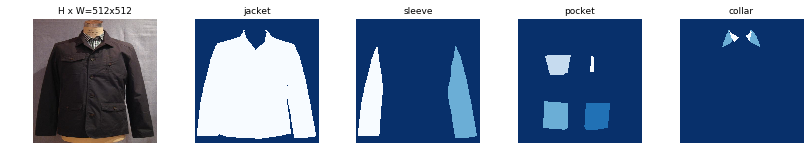

('/kaggle/input/train/01fcb32d81c340e24de107b3a60ec3cc.jpg', ['pants', 'shoe', 'shoe', 'sleeve', 'sleeve', 'shirt, blouse', 'collar', 'cardigan', 'belt', 'neckline'])


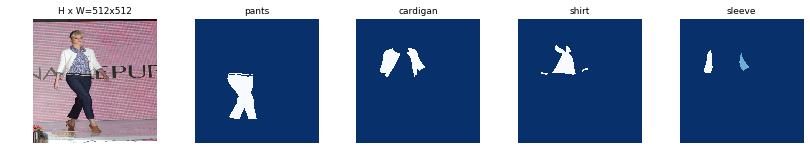

('/kaggle/input/train/4b184c67f0c323f7d49af85eac33708e.jpg', ['collar', 'sleeve', 'sleeve', 'pocket', 'shirt, blouse'])


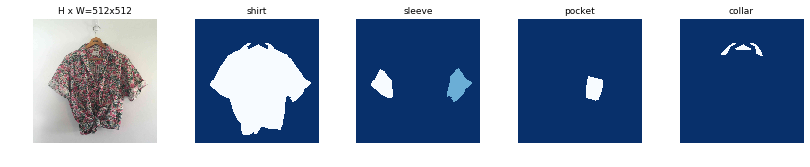

('/kaggle/input/train/ef85d8a8703902826039776180a8afe8.jpg', ['dress', 'neckline', 'neckline', 'zipper', 'shoe', 'shoe'])


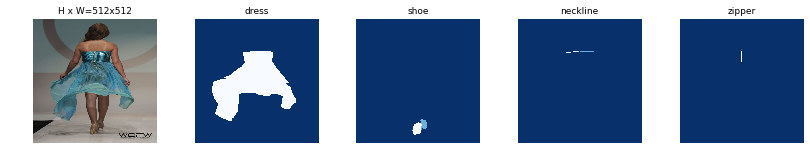

('/kaggle/input/train/a7766d660ec34b608d23bbb788d68907.jpg', ['shoe', 'shoe', 'tights, stockings', 'tights, stockings', 'jumpsuit', 'neckline', 'top, t-shirt, sweatshirt', 'sleeve', 'sleeve', 'neckline'])


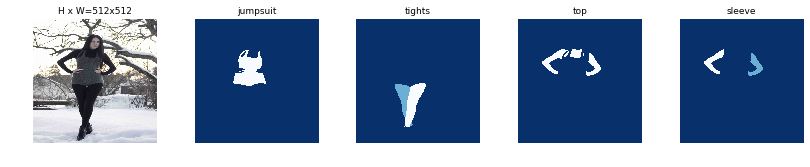

('/kaggle/input/train/fe8d4f54e561bf7a76f70e6b28299d59.jpg', ['shirt, blouse', 'collar', 'sleeve', 'sleeve'])


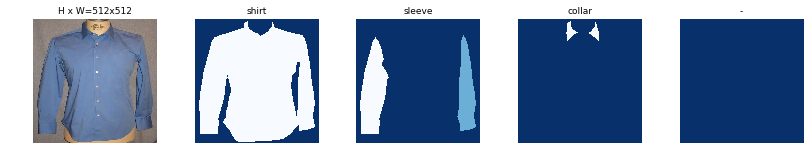

In [12]:
dataset = FashionDataset(image_df)
dataset.prepare()

for i in range(6):
    image_id = random.choice(dataset.image_ids)
    print(dataset.image_reference(image_id))
    
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names, limit=4)

ก่อนที่จะเทรน ก็จะทำการแบ่งข้อมูลเป็น training set กับ validation set

In [13]:
train_df, valid_df = train_test_split(image_df, test_size=0.2, random_state=42)

train_dataset = FashionDataset(train_df)
train_dataset.prepare()

valid_dataset = FashionDataset(valid_df)
valid_dataset.prepare()

เมื่อสร้าง training set และ validation set เสร็จแล้ว ก็จะลองทำ visualization ดูว่า category ต่างๆ มีการกระจายเป็นยังไงบ้างครับ

Total train images:  36500
Total train segments:  267004


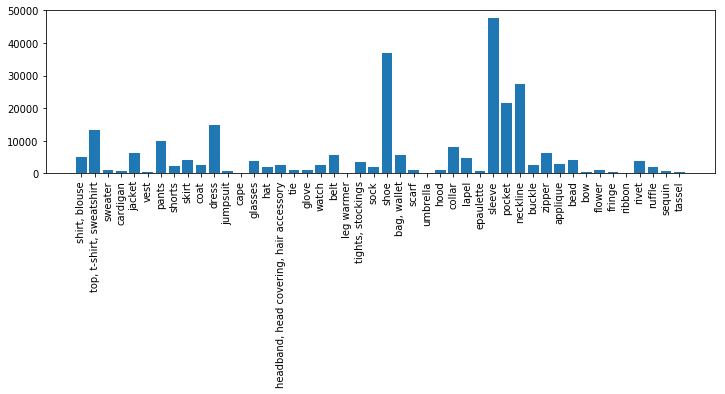

Total validation images:  9125
Total validation segments:  66411


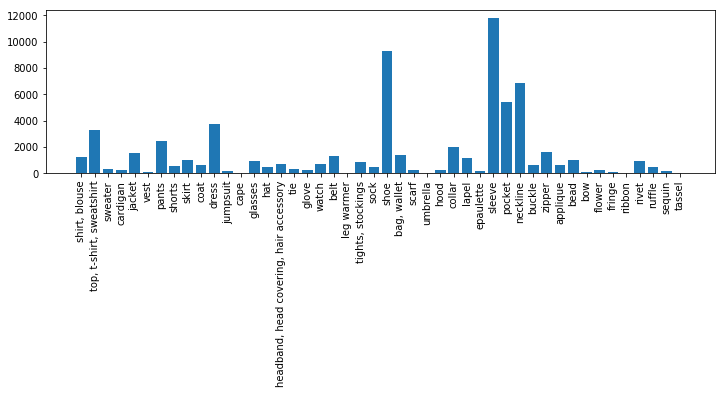

In [14]:
train_segments = np.concatenate(train_df['CategoryId'].values).astype(int)
print("Total train images: ", len(train_df))
print("Total train segments: ", len(train_segments))

plt.figure(figsize=(12, 3))
values, counts = np.unique(train_segments, return_counts=True)
plt.bar(values, counts)
plt.xticks(values, label_names, rotation='vertical')
plt.show()

valid_segments = np.concatenate(valid_df['CategoryId'].values).astype(int)
print("Total validation images: ", len(valid_df))
print("Total validation segments: ", len(valid_segments))

plt.figure(figsize=(12, 3))
values, counts = np.unique(valid_segments, return_counts=True)
plt.bar(values, counts)
plt.xticks(values, label_names, rotation='vertical')
plt.show()

## 2.5 Train

ในขั้นแรกของกระบวนการเทรน ก็จะสร้างโมเดล Mask R-CNN จาก config ที่กำหนดไว้ และโหลด pretrained weight มาใส่ครับ

In [15]:
model = modellib.MaskRCNN(mode='training', config=config, model_dir=ROOT_DIR)

model.load_weights(COCO_WEIGHTS_PATH, by_name=True, exclude=[
    'mrcnn_class_logits', 'mrcnn_bbox_fc', 'mrcnn_bbox', 'mrcnn_mask'])

Instructions for updating:
Colocations handled automatically by placer.


library นี้ รองรับการทำ augmentation จาก [imgaug](https://github.com/aleju/imgaug) ด้วย ในที่นี้ได้เพิ่ม augmentation ที่เป็น horizontal flip เข้าไป

In [16]:
augmentation = iaa.Sequential([
    iaa.Fliplr(0.5)
])

ในขั้นแรก จะทำการเทรนเฉพาะส่วนหัวของโมเดลก่อนครับ

In [17]:
%%time
model.train(train_dataset, valid_dataset,
            learning_rate=2e-3,
            epochs=1,
            layers='heads',
            augmentation=None)

history = model.keras_model.history.history


Starting at epoch 0. LR=0.002

Checkpoint Path: /kaggle/working/fashion20190613T0602/mask_rcnn_fashion_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4     

แล้วต่อมาจึงค่อยเทรนโมเดลทั้งหมด

In [18]:
%%time
model.train(train_dataset, valid_dataset,
            learning_rate=1e-3,
            epochs=3,
            layers='all',
            augmentation=augmentation)

new_history = model.keras_model.history.history
for k in new_history: history[k] = history[k] + new_history[k]


Starting at epoch 1. LR=0.001

Checkpoint Path: /kaggle/working/fashion20190613T0602/mask_rcnn_fashion_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a_branch2b      

ในที่นี้ได้เทรนไปทั้งสิ้นจำนวน 3 รอบ (epoch) เมื่อเทรนเสร็จแล้วก็จะพล็อตกราฟของ loss โดยรวม และ loss ของหัว class กับหัว mask ออกมาดู พร้อมกับเลือกโมเดลในรอบที่ดีที่สุดเพื่อนำไปใช้กับ test data ต่อไปครับ

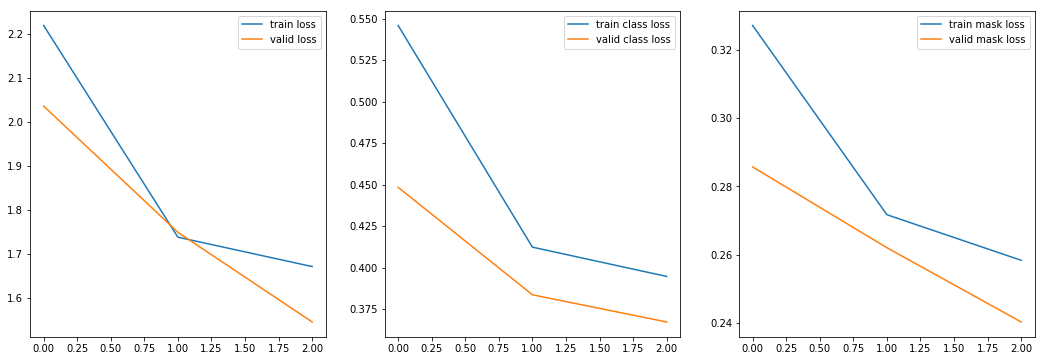

In [19]:
epochs = range(3)

plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.plot(epochs, history['loss'], label="train loss")
plt.plot(epochs, history['val_loss'], label="valid loss")
plt.legend()
plt.subplot(132)
plt.plot(epochs, history['mrcnn_class_loss'], label="train class loss")
plt.plot(epochs, history['val_mrcnn_class_loss'], label="valid class loss")
plt.legend()
plt.subplot(133)
plt.plot(epochs, history['mrcnn_mask_loss'], label="train mask loss")
plt.plot(epochs, history['val_mrcnn_mask_loss'], label="valid mask loss")
plt.legend()

plt.show()

In [20]:
best_epoch = np.argmin(history["val_loss"]) + 1
print("Best epoch: ", best_epoch)
print("Valid loss: ", history["val_loss"][best_epoch-1])

Best epoch:  3
Valid loss:  1.5442627835273743


## 2.6 Predict

ขั้นตอนสุดท้ายก็จะเป็นการนำโมเดลที่เทรนไว้มาใช้ทำนาย test data โดยเริ่มจากการเซ็ตค่า config แล้วโหลดโมเดลที่เทรนไว้ขึ้นมา

In [21]:
class InferenceConfig(FashionConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

glob_list = glob.glob(f'/kaggle/working/fashion*/mask_rcnn_fashion_{best_epoch:04d}.h5')
model_path = glob_list[0] if glob_list else ''

model = modellib.MaskRCNN(mode='inference', 
                          config=inference_config,
                          model_dir=ROOT_DIR)

assert model_path != '', "Provide path to trained weights"
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Instructions for updating:
Use tf.cast instead.
Loading weights from  /kaggle/working/fashion20190613T0602/mask_rcnn_fashion_0003.h5
Re-starting from epoch 3


แล้วอ่านไฟล์ sample_submission.csv ซึ่งมีชื่อรูปภาพที่จะต้องทำการทดสอบ

In [22]:
sample_df = pd.read_csv(DATA_DIR/"sample_submission.csv")
sample_df.head()

,ImageId,EncodedPixels,ClassId
0,003d41dd20f271d27219fe7ee6de727d.jpg,1 1,23
1,0046f98599f05fd7233973e430d6d04d.jpg,1 1,23
2,004e9e21cd1aca568a8ffc77a54638ce.jpg,1 1,23
3,005b37fce3c0f641d327d95dd832f51b.jpg,1 1,23
4,0094940c58c343b742f48ae26eb5e9fa.jpg,1 1,23


ฟังก์ชัน to_rle เป็นฟังก์ชันที่แปลง mask จากโมเดลเป็น run-length encoding ซึ่งเป็น format ที่ใช้ในการส่งผลลัพธ์ครับ

In [23]:
def to_rle(bits):
    rle = []
    pos = 1
    for bit, group in itertools.groupby(bits):
        group_list = list(group)
        if bit:
            rle.extend([pos, len(group_list)])
        pos += len(group_list)
    return rle

นอกจากนี้ ระบบตรวจผลลัพธ์ยังไม่อนุญาตให้ pixel นึง อยู่ใน mask หลายอันที่เป็นคลาสเดียวกัน จึงต้องมีฟังก์ชัน trim_masks เพื่อใช้แก้กรณีนี้

In [24]:
def trim_masks(masks, rois, class_ids):
    class_pos = np.argsort(class_ids)
    class_rle = to_rle(np.sort(class_ids))
    
    pos = 0
    for i, _ in enumerate(class_rle[::2]):
        previous_pos = pos
        pos += class_rle[2*i+1]
        if pos-previous_pos == 1:
            continue 
        mask_indices = class_pos[previous_pos:pos]
        
        union_mask = np.zeros(masks.shape[:-1], dtype=bool)
        for m in mask_indices:
            masks[:, :, m] = np.logical_and(masks[:, :, m], np.logical_not(union_mask))
            union_mask = np.logical_or(masks[:, :, m], union_mask)
        for m in mask_indices:
            mask_pos = np.where(masks[:, :, m]==True)
            if np.any(mask_pos):
                y1, x1 = np.min(mask_pos, axis=1)
                y2, x2 = np.max(mask_pos, axis=1)
                rois[m, :] = [y1, x1, y2, x2]
            
    return masks, rois

ในส่วนนี้ก็จะเป็นการรันเพื่อทำนายผลลัพธ์ครับ

In [25]:
%%time
sub_list = []
missing_count = 0
for i, row in tqdm(sample_df.iterrows(), total=len(sample_df)):
    image = resize_image(str(DATA_DIR/'test'/row['ImageId']))
    result = model.detect([image])[0]
    if result['masks'].size > 0:
        masks, _ = trim_masks(result['masks'], result['rois'], result['class_ids'])
        for m in range(masks.shape[-1]):
            mask = masks[:, :, m].ravel(order='F')
            rle = to_rle(mask)
            label = result['class_ids'][m] - 1
            sub_list.append([row['ImageId'], ' '.join(list(map(str, rle))), label])
    else:
        # The system does not allow missing ids, this is an easy way to fill them
        sub_list.append([row['ImageId'], '1 1', 23])
        missing_count += 1

100%|██████████| 3200/3200 [19:08<00:00,  3.33it/s]

CPU times: user 16min 59s, sys: 6min 43s, total: 23min 42s
Wall time: 19min 8s


เมื่อได้ผลลัพธ์ออกมาแล้ว ก็จะนำมาสร้างเป็นไฟล์สำหรับส่งตรวจ

In [26]:
submission_df = pd.DataFrame(sub_list, columns=sample_df.columns.values)
print("Total image results: ", submission_df['ImageId'].nunique())
print("Missing images: ", missing_count)
submission_df.head()

Total image results:  3200
Missing images:  1


,ImageId,EncodedPixels,ClassId
0,003d41dd20f271d27219fe7ee6de727d.jpg,71551 4 72060 13 72571 15 73080 18 73587 24 74...,31
1,003d41dd20f271d27219fe7ee6de727d.jpg,167138 10 167647 19 168157 24 168664 33 169159...,31
2,003d41dd20f271d27219fe7ee6de727d.jpg,107689 1 108200 2 108711 4 109222 7 109733 9 1...,33
3,003d41dd20f271d27219fe7ee6de727d.jpg,100778 4 100791 1 101289 6 101299 5 101801 6 1...,32
4,003d41dd20f271d27219fe7ee6de727d.jpg,86926 33 87426 61 87933 78 88440 86 88949 94 8...,8


In [27]:
submission_df.to_csv("submission.csv", index=False)

สุดท้ายนี้ ลองมาดูผลลัพธ์ที่ได้กันซักหน่อยครับ จะเห็นว่าไม่เลวเลยทีเดียว แม้จะยังมีที่ผิดอยู่ก็ตาม

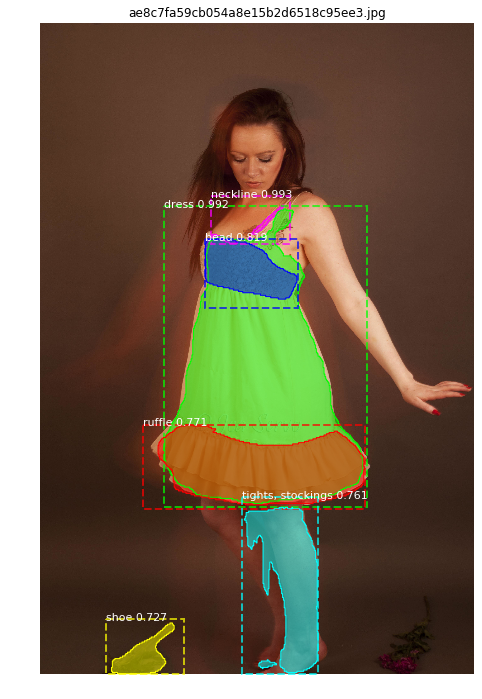

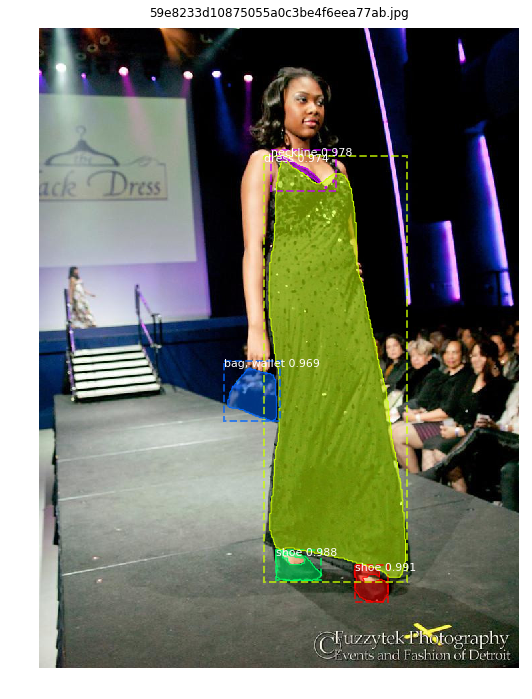

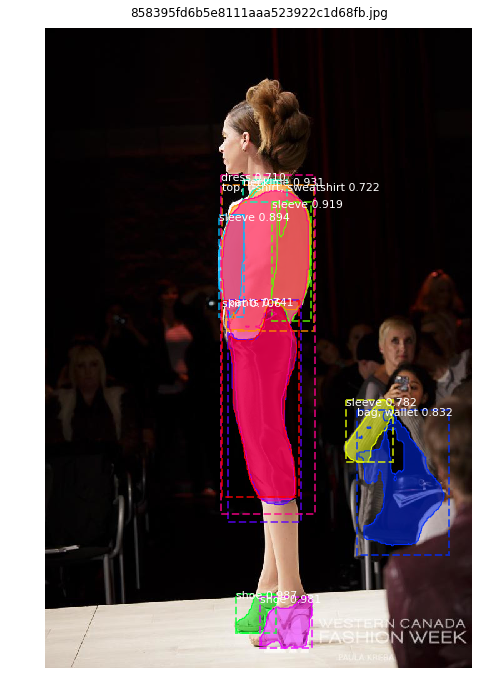

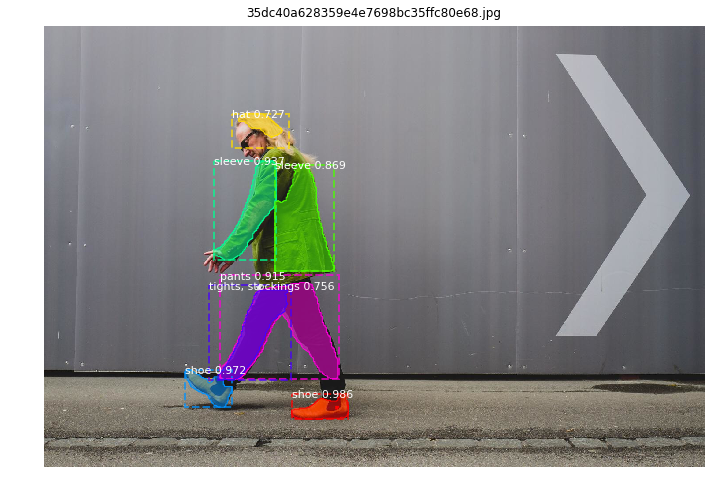

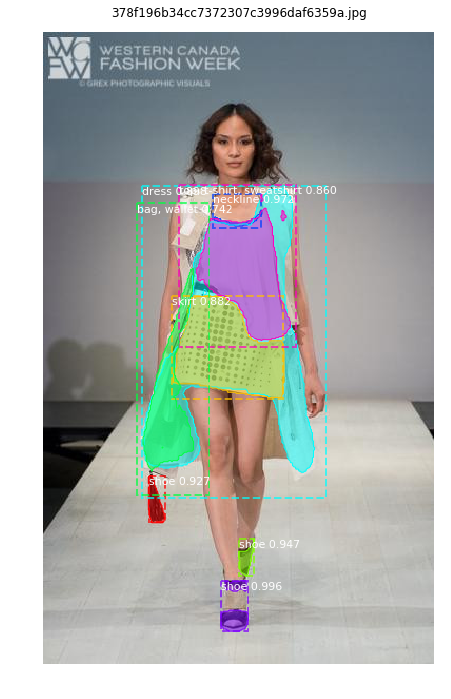

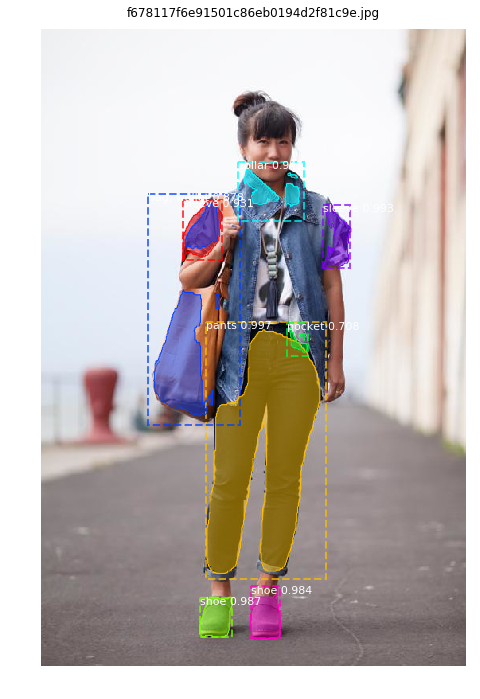

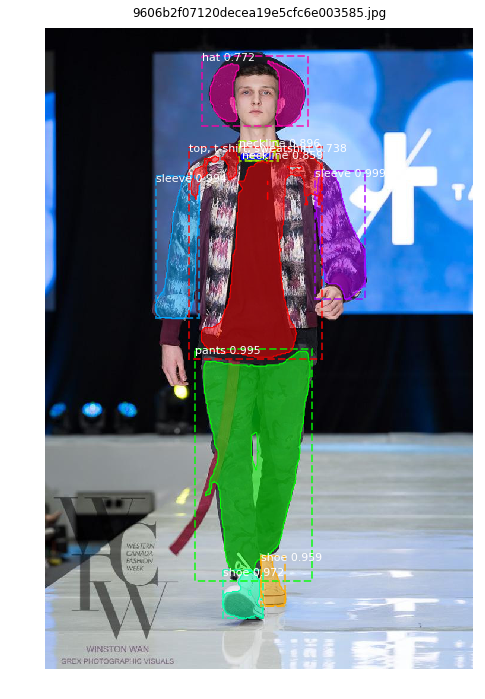

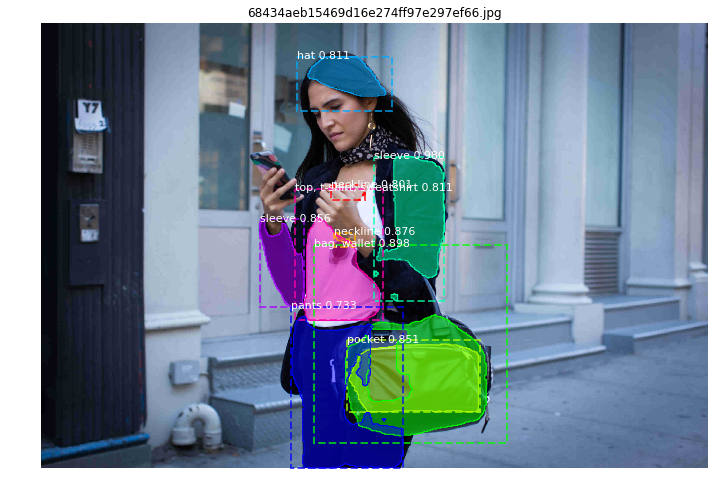

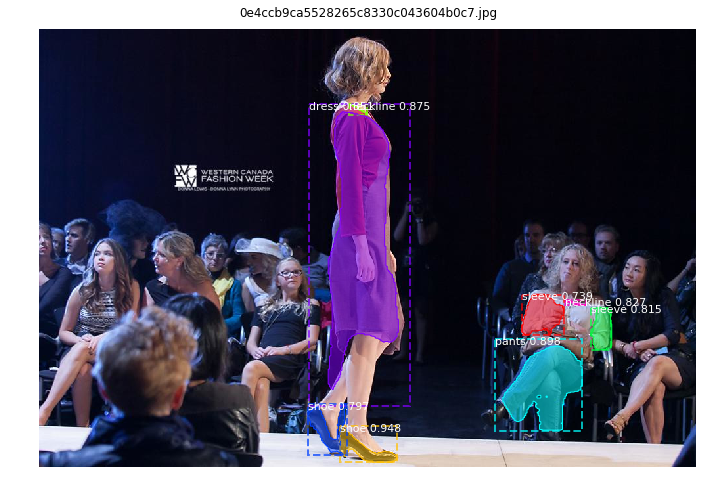

In [28]:
for i in range(9):
    image_id = sample_df.sample()['ImageId'].values[0]
    image_path = str(DATA_DIR/'test'/image_id)
    
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    result = model.detect([resize_image(image_path)])
    r = result[0]
    
    if r['masks'].size > 0:
        masks = np.zeros((img.shape[0], img.shape[1], r['masks'].shape[-1]), dtype=np.uint8)
        for m in range(r['masks'].shape[-1]):
            masks[:, :, m] = cv2.resize(r['masks'][:, :, m].astype('uint8'), 
                                        (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
        
        y_scale = img.shape[0]/IMAGE_SIZE
        x_scale = img.shape[1]/IMAGE_SIZE
        rois = (r['rois'] * [y_scale, x_scale, y_scale, x_scale]).astype(int)
        
        masks, rois = trim_masks(masks, rois, r['class_ids'])
    else:
        masks, rois = r['masks'], r['rois']
        
    visualize.display_instances(img, rois, masks, r['class_ids'], 
                                ['bg']+label_names, r['scores'],
                                title=image_id, figsize=(12, 12))